In [4]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset("titanic")

```markdown
Variable    Definition      Key

survival    Survival        0 = No, 1 = Yes
pclass      Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
```

In [9]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Sklearn

In [5]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
     |████████████████████████████████| 8.6 MB 12.1 MB/s            
     |████████████████████████████████| 297 kB 58.6 MB/s            
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
You should consider upgrading via the '/Users/federicomoreno/PycharmProjects/UCEMA/venv/bin/python -m pip install --upgrade pip' command.


In [6]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [11]:
# Crea X con pclass','sibsp','parch','fare' y el valor a predecir y
X = #seleccion del dataframe
y = #seleccion


In [12]:

# Instancia el modelo de regresion lineal
model = #regresion linal skelear

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()

accuracy

0.6835791852363318

## ¿Cómo cambia mi accuracy a mayor cantidad de daots?

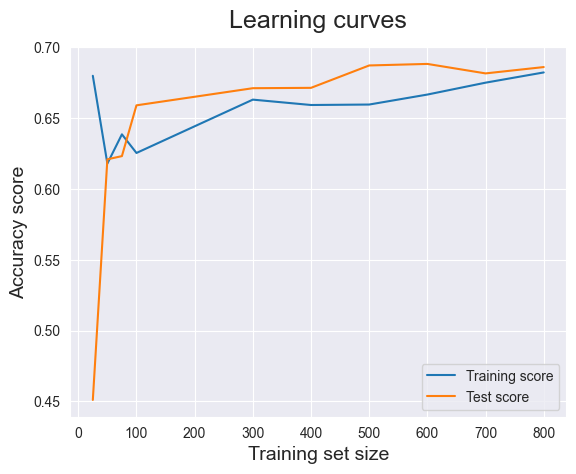

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1000),
                                                              X = X,
                                                              y = y,
                                                              train_sizes = [25,50,75,100,300,400,500,600,700,800],
                                                              cv = 20)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend()

## Crear un set reducido de dataframe

In [16]:
# Create the reduced feature set and target
df_reduced = #sample
X_reduced = #seleccion
y_reduced = #seleccion

# 5-Fold Cross validate model
cv_results = cross_validate(LogisticRegression(max_iter=1000), X_reduced, y_reduced, cv=5)

# Mean of accuracies
reduced_training_accuracy = cv_results['test_score'].mean()

reduced_training_accuracy

0.682

## Predicciones

¿Sobrevivió la siguiente persona al desastre del Titanic?

- Viajó en clase 1 (`Pclass`)
- No tenía cónyuge o hermanos a bordo (`SibSp`)
- No tenía padres ni hijos a bordo (`Parch`)
- Pagó 15 por su billete (`Tarifa`)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = # completar con modelo

# se entrena el modelo
log_model.fit(np.array(X_reduced), y_reduced)

# Use the trained model to predict
prediction = log_model.predict([[#valores de las variables]])[0]

prediction

In [18]:

#Completar con probabilidad
# buscar en la documentación cómo acceder a la probabilidad del modelo e imprimirla

0.6216473629532002

## Calibracion

-  La precisión solo evalúa el rendimiento de tu modelo en función de las **clases** 0 y 1 predichas (obtenidas a través de `.predict()`)
- Una alta precisión no significa necesariamente que las **probabilidades** pronosticadas estén "calibradas" (obtenidas a través de `.predict_probas()`)

¿Qué significa probabilidades "calibradas"?
> _Entre las muestras a las que su modelo dio un valor predict_proba cercano a 0,9, aproximadamente el 90 % pertenece realmente a la clase positiva._

**Pregunta 1**: Lea más sobre [Calibración](https://scikit-learn.org/stable/modules/calibration.html) en documentos de sklearn

**Pregunta 2**: Intente implementar [`CalibrationDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibrationDisplay.html) para verificar si su modelo está calibrado (en un conjunto de prueba de retención)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibrationDisplay

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5, random_state=1)


model = #Compeltar con un fit del modelo


# Completar con la curva de calibracion